In [55]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df_list = []
for i in range(5):
    df_list.append(pd.read_csv("plot/results_{}.txt".format(i), sep=" ", index_col=0))

df = pd.concat(df_list)
df

,best,mean,std
gen,,,
0,90.524826,10.932825,30.379229
1,90.524826,11.116252,30.277031
2,66.779644,24.101796,27.691566
3,90.324826,26.449135,31.908476
0,92.612614,31.948609,35.052523
1,91.067281,30.003137,35.140173
2,92.612614,35.920280,36.610279
3,92.612614,38.309023,41.975775
0,66.498742,6.810972,21.083698


In [156]:
mean_of_means = np.array(df.groupby(df.index)['mean'].mean())
sd_of_means = np.array(df.groupby(df.index)['mean'].std())
mean_of_bests = np.array(df.groupby(df.index)['best'].mean())
sd_of_bests = np.array(df.groupby(df.index)['best'].std())
gen_nums = np.arange(len(mean_of_means))

In [157]:
df_plot = pd.DataFrame({'mean_of_means': mean_of_means, 'sd_of_means': sd_of_means, 'mean_of_bests': mean_of_bests, 'sd_of_bests': sd_of_bests})

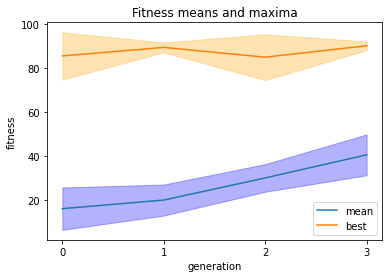

In [158]:
lb_mean = mean_of_means - sd_of_means
ub_mean = mean_of_means + sd_of_means
lb_best = mean_of_bests - sd_of_bests
ub_best = mean_of_bests + sd_of_bests

fig, ax = plt.subplots()
ax.plot(df_plot['mean_of_means'], label='mean')
ax.plot(df_plot['mean_of_bests'], label='best')

plt.fill_between(gen_nums, lb_mean, ub_mean, alpha=.3, color="blue")
plt.fill_between(gen_nums, lb_best, ub_best, alpha=.3, color="orange")
plt.xticks(gen_nums)
ax.set_xlabel("generation")
ax.set_ylabel("fitness")
ax.set_title("Fitness means and maxima")
ax.legend()
plt.show()